# WARNING - STOP AND READ THIS FIRST    
For reasons that are detailed in the root README.md, I'm using Cauldron notebooks in this project to display meaningful results. 

*Any Jupyter notebooks are just exploratory chicken scratches and will be essentially meaningless.*

If you want to see meaningful outputs, you have three easy options:
- Option 1: check within this directory for a folder called 'html' - within that directory will be an html file where you can see all the visuals.
- Option 2: go to http://unnotebook.com/reader-install/ and install the reader, and point it to the EDA.cauldron file in this directory. The install is actually fast and easy, and the visuals look the best in this format.
- Option 3: check this directory for a pdf that I've printed from the Cauldron notebook. This is just visuals without code, and the visuals aren't as good as the other two options.

In [1]:
from fastai.tabular import add_datepart
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from tqdm import tqdm

%matplotlib inline
#%matplotlib notebook

In [2]:
df = pd.read_csv('../../data/processed/wrangled_dataframe.csv', header=0, low_memory=False)
df['date'] = pd.to_datetime(df['date'])

In [3]:
open = df[df.open == 1].copy()

In [4]:
dfex = df[:100]
dfex.head()

,store,state,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
0,1,HE,2013-01-01,8,6,3,6,3,1,93,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
1,56,HE,2013-01-01,8,6,3,6,3,1,93,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2,69,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
3,77,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
4,111,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


In [5]:
di = df.copy()
di['date'] = pd.to_datetime(di.date)
di['week_start'] = pd.to_datetime(di.week_start)
di.set_index('date', inplace=True)

In [6]:
diex = di.copy()
diex = diex[:100]
diex.sort_index(inplace=True)
diex.head()

,store,state,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,mean_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,HE,8,6,3,6,3,1,93,80,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,56,HE,8,6,3,6,3,1,93,80,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,69,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,77,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,111,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


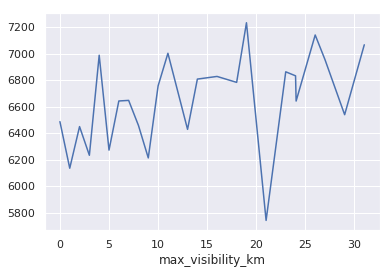

In [19]:
# max_visibility_km
open = df[df.open == 1]
open.groupby('max_visibility_km').sales.mean().plot()

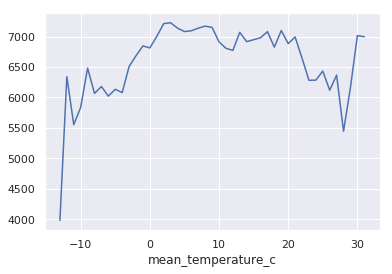

In [21]:
# max_visibility_km
open = df[df.open == 1]
open.groupby('mean_temperature_c').sales.mean().plot()

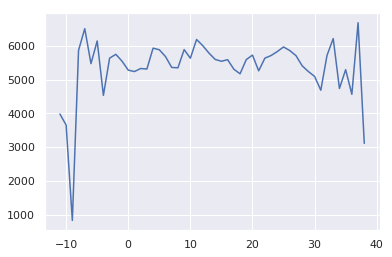

In [63]:
# Except at extreme temperatures, not much correlation between max_temperature_c and sales
total_sales_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'store']].groupby('max_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_max_temperature_c = \
    total_sales_by_max_temperature_c / (store_counts_by_max_temperature_c * 942)
xs = np.array((df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_max_temperature_c);

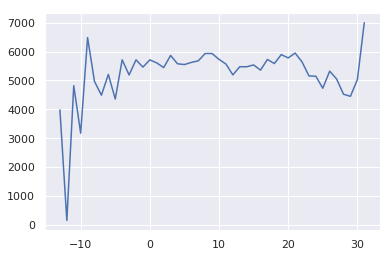

In [64]:
# Except at extreme temperatures, not much correlation between mean_temperature_c and sales
total_sales_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'store']].groupby('mean_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_mean_temperature_c = \
    total_sales_by_mean_temperature_c / (store_counts_by_mean_temperature_c * 942)
xs = np.array((df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_mean_temperature_c);

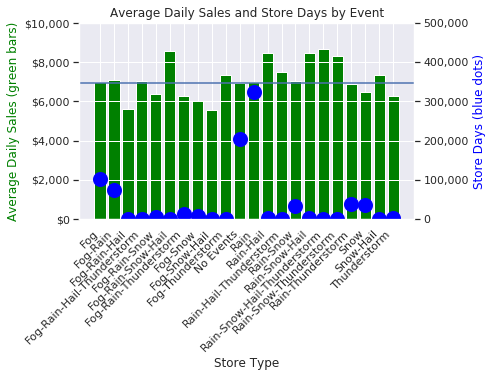

In [26]:
#total_sales_by_events = \
    #np.array(df[['events', 'sales']].groupby('events').sum()[['sales']]).reshape(-1)
#store_counts_by_events = \
    #np.array(df[['events', 'store']].groupby('events').count()[['store']]).reshape(-1)
#avg_daily_sales_by_events = \
    #total_sales_by_events / store_counts_by_events
#xs = np.array((df[['events', 'sales']].groupby('events').sum()).index)
open = df[df.open == 1]
avg_daily_sales_by_events = open.groupby('events').sales.mean()
xs = avg_daily_sales_by_events.index
store_days_by_events = open.groupby('events').date.count()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_events, color='green')
ax_l.set_ylim([0, 10000])
ax_r.plot(xs, store_days_by_events, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 500000])

ax_l.set_title('Average Daily Sales and Store Days by Event')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('Store Type')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(open.sales.mean());